# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "...what we want is a machine that can learn from experience."
> 
> -- Alan Turing, 1947

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Activated                                              | 12  |
| Descending MLR .                                       | 20  |
| Make a Plan                                            | 15  |
| Neuron by Hand                                         | 14  |
| Total                                                  | 61  |


## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Viewing differences in activation functions;
- Applying gradient descent; and,
- Constructing neural networks.


# Assignment - Homework 2
STAT 430 - FDL, Spring 2020

Due: **Friday, February 21st, 2020 at 6:00 PM**

- **Author:** Josh Janda
- **NetID:** joshlj2

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [1]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")

Diagnostics: 
python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
pandas: 1.17.5
Notebook is on Google CoLab


## [12 points] Exercise 1 - Activated

**(a) (4 points)** During lecture, we claimed that the `tanh(x)` is underpinned by the sigmoid activation function. Given that:

$$
\begin{align}
\sigma(x) &= \frac{ e^x }{1 + e^x} = \frac{ 1 }{1 + e^{-x}} \\
\tanh(x) &= \frac{e^x – e^{-x}}{e^x + e^{-x}} 
\end{align}
$$

Show that:

$$\tanh(x) = 2 \sigma(2x) - 1$$


For starters, we must manipulate the tanh(x) equation using the sigma equation.
</br>
$$2\sigma(2x) - 1 = \frac{2}{1 + e^{-2x}} - 1 = \frac{2}{1 + e^{-2x}} - \frac{1 + e^{-2x}}{1 + e^{-2x}} = \frac{2 - (1 + e^{-2x})}{1 + e^{-2x}}$$
</br>
Continuing...
</br>

$$\frac{2 - (1 + e^{-2x})}{1 + e^{-2x}} = \frac{1 - e^{-2x}}{1 + e^{-2x}} = \frac{1 - e^{-x}e^{-x}}{1 + e^{-x}e^{-x}} = \frac{\frac{1}{e^{-x}}*1 - e^{-x}e^{-x}*\frac{1}{e^{-x}}}{\frac{1}{e^{-x}}*1 + e^{-x}e^{-x}*\frac{1}{e^{-x}}}$$
</br>
Continuing...
</br>

$$\frac{\frac{1}{e^{-x}}*1 - e^{-x}e^{-x}*\frac{1}{e^{-x}}}{\frac{1}{e^{-x}}*1 + e^{-x}e^{-x}*\frac{1}{e^{-x}}} = \frac{\frac{1}{e^{-x}} - e^{-x}}{\frac{1}{e^{-x}} + e^{-x}} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

</br>

So, as shown above, $tanh(x) = 2\sigma(2x) - 1$.



**(b) (2 points)** Consider the _Exponential Linear Unit_ ('ELU') activation function:

$$g(x) = \max{\left({\alpha(\exp x - 1), x)}\right)}, \alpha \ge 0 $$

Implement ELU as a function in Python that uses NumPy's vectorization abilities.

Implementation Guidelines:

- **Arguments:**
    - `x`: A vector of values to "activate".
    - `alpha`: Scale for the negative factor.
- **Return:**
    - A vector with each element "activated".

In [0]:
def elu(x, alpha = 1):

  activation = np.where(x > 0, x, alpha * (np.exp(x) - 1))

  return activation

**(c) (3 points)** Graph the ELU activation function with varying values for $\alpha$.  How does the graph change?

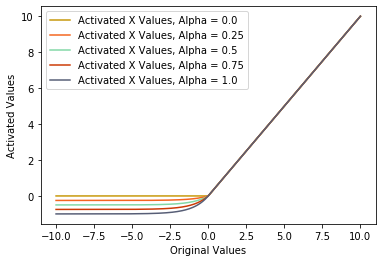

In [3]:
x = np.linspace(-10, 10, num = 250)

alphas = np.linspace(0, 1, num = 5)

colors = ['#C7980A', '#F4651F', '#82D8A7', '#CC3A05', '#575E76']

for i, alpha in enumerate(alphas):

  activated_x = elu(x, alpha)
  plt.plot(x, activated_x, color = colors[i], label = "Activated X Values, Alpha = {0}".format(alpha))

plt.xlabel("Original Values")
plt.ylabel("Activated Values")
plt.legend()
plt.show()

Looking at the graph above, we can see that as alpha is increases the activated values given x is negative get farther from zero. As alpha gets closer to zero, the activated negative x values get closer to zero (when alpha is 0, ELU is functionally the same as ReLU). So, increasing the alpha value changes how the ELU function activates the negative original values.

**(d) (3 points)** Graph the ELU activation function alongside `sigmoid()`, `tanh()`, `relu()`, and `leaky_relu()`. How does it differ when compared to the others?

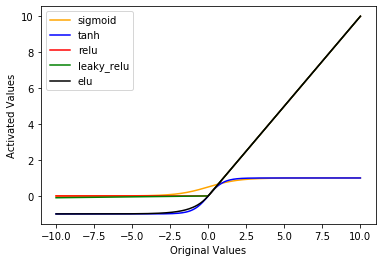

In [4]:
def sigmoid(x):

  return 1 / (1 + np.exp(-x))

def tanh(x):

  return (2 / (1 + np.exp(-2*x))) - 1

def relu(x):

  return np.maximum(0, x)

def leaky_relu(x):

  return np.where(x > 0 , x, .01 * x)

activations = [sigmoid, tanh, relu, leaky_relu, elu]
colors = ['orange', 'blue', 'red', 'green', 'black']

for color, activation in zip(colors, activations):
  
  activated_x = activation(x)

  plt.plot(x, activated_x, color = color, label = "{0}".format(activation.__name__))

plt.xlabel("Original Values")
plt.ylabel("Activated Values")
plt.legend()
plt.show()

Looking at the graph above, when comparing ELU to other activation functions, ELU performs similar to the tanh function for negative x values and exactly like leaky_relu and relu for non-negative values (using the default value of $\alpha = 1$). This is due to the exponential component for when x < 0, and the linear component for when x > 0. ELU seems to have a similar idea to leaky_relu for preventing dying/vanishing gradients, but instead of multiplying by a constant you use an exponential type of function that is similar to tanh.

## [20 points] Exercise 2 - Descending MLR

The objective of this question is to construct a shallow neural network that is updated using gradient descent.

**(a) (4 points)** Design and implement a function that randomly generates a set of data and predictions for linear regression given dimensions and parameter values. Make sure to add "noise" to the predictions to avoid having a perfectly linear relationship and ensure that the first column of the design matrix contains only the value **1** so that the model has an intercept term.

$$\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

Implementation Guidelines:

- **Arguments:**
    - `n`: Number of Observations
    - `theta`: A vector of true parameter values up to `p`.
    - `noise`: A single value that adds distortion. 
    - `seed`: Value to generate the data under. 
- **Return:**
    - `X` the design matrix of dimensions `n x (p + 1)`, with the first column a series of 1s. 
    - `y` the values observed with added noise.

_Hints:_

- NumPy has a built in way of generating random data with [`np.random.randn(n, p)`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)
- Moreover, to add a column, consider using [`np.append(new_col, data, 1)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html).


**Note:** _Python_ allows a function to return multiple values by having them prefixed by a comma `,` in the `return` statement. E.g. `return x1, x2` would return both `x1` and `x2`. These values may be unpacked and assigned individually on the same line as a function call:

```
x_v1, x_v2 = my_function()
```



In [0]:
def generate_data(n, theta, noise, seed):

  np.random.seed(seed = seed)
  X = np.column_stack((np.ones(n), np.random.randn(n, len(theta) - 1)))
  y = X @ theta + noise
  
  return X, y

**(b) (2 points)** Create a function for obtain multiple linear regression predictions.

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
- **Return:**
    - A vector of prediction length `n`.



In [0]:
def generate_predictions(X, theta):

  X @ theta

  return X @ theta

**(c) (2 points)** Implement the mean squared error cost function for multiple linear regression in Python.

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
    - `theta`: A vector of parameter estimates `p`.
- **Return:**
    - Single value of cost.

In [0]:
def mean_squared_error(X, y, theta):

  predictions = X @ theta

  mse = np.sum((y - predictions)**2) / y.shape[0]

  return mse

**(d) (8 points)** Build a function that performs gradient descent for multiple linear regression across all parameters.

That is, compute:

$$\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta_0, \theta_1, \cdots, \theta_p)$$

where:

$$\frac{\partial }{\partial \theta_j} J(\theta_0, \theta_1, \cdots, \theta_p) = \frac{1}{n} \sum_{i=1}^n \left({ x_{ij} \theta_j  - y_i}\right)x_{ij}$$

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
    - `theta`: A vector of parameter estimates `p`.
    - `alpha`: The learning rate for the problem. 
     - Default: `0.0001`
    -  `epochs`: Number of times to run gradient descent
- **Return:**
    - `theta_hat`: The estimated values for the parameters.
    - `cost`: Final cost value.

In [0]:
def fit_model(X, y, theta, epochs, alpha = .0001):

  for epoch in range(epochs):
    
    n = y.shape[0]
    predictions = generate_predictions(X, theta)
    preds_minus_y = (predictions - y).reshape(-1, 1)
    theta = theta - (alpha / n) * (X * (preds_minus_y)).sum(axis = 0)
    cost = mean_squared_error(X, y, theta)

    if epoch % 1000 == 0:
      print("Epoch: {0} - Current Cost: {1}".format(epoch, cost))

  theta_hat = theta
  return theta_hat, cost

**(e) (4 points)** With the functions in hand, attempt to perform an estimation under conditions:

_Scenario 1_:

$$
\begin{align}
\theta_0 &= -2.8, \theta_1 = 1.5\\
n &= 250, epoch = 500 \\
\end{align}
$$

_Scenario 2_:

$$
\begin{align}
\theta_0 &= 0.5, \theta_1 = -1, \theta_2 = 2.3 \\
n &= 100, epoch = 500 \\
\end{align}
$$

**For reproducibility, set a seed using the last four digits of your UIN.**

In [10]:
np.random.seed(seed = 8173)
X_scen1, y_scen1 = generate_data(250, np.array([-2.8, 1.5]), np.random.randn(1), seed = 8173)
X_scen2, y_scen2 = generate_data(100, np.array([0.5, -1, 2.3]), np.random.randn(1), seed = 8173)

print("Starting Scenario 1...")
theta_hat_scen1, final_cost_scen1 = fit_model(X_scen1, y_scen1, theta = np.random.randn((2)), epochs = 5000) # increased epochs to 5000 by James advice..
print("Starting Scenario 2...")
theta_hat_scen2, final_cost_scen2 = fit_model(X_scen2, y_scen2, theta = np.random.randn((3)), epochs = 5000) # increased epochs to 5000 by James advice..

Starting Scenario 1...
Epoch: 0 - Current Cost: 7.140942669291438
Epoch: 1000 - Current Cost: 5.850304395471624
Epoch: 2000 - Current Cost: 4.793020846356729
Epoch: 3000 - Current Cost: 3.926883758024069
Epoch: 4000 - Current Cost: 3.217322398656408
Starting Scenario 2...
Epoch: 0 - Current Cost: 23.844585560675032
Epoch: 1000 - Current Cost: 19.06542114110347
Epoch: 2000 - Current Cost: 15.250984572839764
Epoch: 3000 - Current Cost: 12.205144330474695
Epoch: 4000 - Current Cost: 9.771926283558885


In [11]:
print("Scenario 1 Theta Hat Values: {0} -- Final Cost: {1}".format(theta_hat_scen1, final_cost_scen1))
print("Scenario 2 Theta Hat Values: {0} -- Final Cost: {1}".format(theta_hat_scen2, final_cost_scen2))

Scenario 1 Theta Hat Values: [-1.7012255  0.2613319] -- Final Cost: 2.636546324346386
Scenario 2 Theta Hat Values: [ 0.92631801 -0.09939461  1.65888711] -- Final Cost: 7.828969194209204


The final cost for scenario 1 is 2.636 and 7.829 for scenario 2. While these final costs are pretty low, they can definitely be improved.

Judging by our estimates of theta compared to the true values, is obvious that either we need to increase the number of epochs or the learning rate. Having a learning rate of .0001 is incredibly small for multiple linear regression, and can definitely be increased to about .01 for quicker convergence. This is due to multiple linear regression equations having a bowl shaped gradient, so using a higher learning rate will result in a quicker convergence to the global minimum without the risk of skipping over.

In [12]:
print("Starting Scenario 1 w/ Alpha = .01...")
theta_hat_scen12, final_cost_scen12 = fit_model(X_scen1, y_scen1, theta = np.random.randn((2)), epochs = 500, alpha = .01)
print("Starting Scenario 2 w/ Alpha = .01...")
theta_hat_scen22, final_cost_scen22 = fit_model(X_scen2, y_scen2, theta = np.random.randn((3)), epochs = 500, alpha = .01)

Starting Scenario 1 w/ Alpha = .01...
Epoch: 0 - Current Cost: 7.5365325815421045
Starting Scenario 2 w/ Alpha = .01...
Epoch: 0 - Current Cost: 27.511497118403835


In [13]:
print("Scenario 1 Theta Hat Values: {0} -- Final Cost: {1}".format(theta_hat_scen12, final_cost_scen12))
print("Scenario 2 Theta Hat Values: {0} -- Final Cost: {1}".format(theta_hat_scen22, final_cost_scen22))

Scenario 1 Theta Hat Values: [-2.73893314  1.50136693] -- Final Cost: 0.00030448200307358107
Scenario 2 Theta Hat Values: [ 3.33395241 -1.00467155  2.30144193] -- Final Cost: 0.00048268794448859864


Looking at the results above, I get much smaller final costs when using a larger learning rate. I also obtain theta estimates much closer to the true values.

Overall, this experiment has shown that learning rate and epochs are a tuneable parameter and can have a great effect on your estimates.

## [15 points] Exercise 3 - Make a Plan



Consider a neural network being built to classify color images of size 4 x 3 x 3 into 4 different categories. The architecture of the network has two hidden layers with 5 nodes in the first and 3 nodes in second layer.

**(a) (5 Points)** Sketch the network with all connections. Make sure to include bias nodes for each layer.

**(b) (10 Points)** Write the equations for each layer of the neural network. Make sure to specify the dimensions expected for each equation.

![](https://i.imgur.com/vS37Heo.jpg)

Layer 1:

Note that superscript is layer number and subscript is matrix dimensions.

X must be flattened into a m x 36 matrix in order to feed into fully connected nodes.

$$Z^{(1)}_{(m, 5)} = X_{(m, 36)}W^{(1)}_{(36, 5)} + b^{(1)}_{(m, 5)}$$
$$a^{(1)}_{(m, 5)} = g(Z^{(1)}_{(m, 5)})$$

Layer 2:

$$Z^{(2)}_{(m, 3)} = a^{(1)}_{(m, 5)}W^{(2)}_{(5, 3)} + b^{(2)}_{(m, 3)}$$
$$a^{(2)}_{(m, 3)} = g(Z^{(2)}_{(m, 3)})$$

Layer 3 (output layer):

$$Z^{(3)}_{(m, 4)} = a^{(2)}_{(m, 3)} W^{(3)}_{(3, 4)}+ b^{(3)}_{(m, 4)}$$
$$a^{(3)}_{(m, 4)} = g(Z^{(3)}_{(m, 4)}) = \hat y_{(m, 4)}$$

## [14 Points] Exercise 4 - Neuron by Hand

Consider a single neuron that takes $z = b + w_1 x_1 + w_2 x_2$ and has an activation function of $ReLU(z)$.

**(a) (6 Points)** Sketch out a computational graph that shows how the computation is being performed.

**(b) (2 Points)** Perform a forward propagation step given data:

$$
\begin{align}
b &= 1.2 \\
w_1 &= 0.3, w_2 = 0.5 \\
x_1 &= 1, x_2 = 2 \\
\end{align}
$$

**(c) (6 Points)** Compute the partial derivatives for backward propagation.

![](https://i.imgur.com/F0uYzK1.jpg)

![](https://drive.google.com/open?id=1dqn0IJyY0dChFIfHVbfvJ4OQQIuiHyST)